In [182]:
import pandas as pd
#se define un data frame para cargar el archivo que contiene los datos de entrenamiento
dtincome = pd.read_csv("/Machine Learning/Data/Ingresos_Mensuales.csv")
#se muestra el dataframe
dtincome.head()

,Nombre,Edad,Ingresos
0,DAYAN,27,7000000
1,HELMAN,29,9000000
2,JOHNATAN,30,6100000
3,JAIME,30,6000000
4,DANIELA,28,15000000


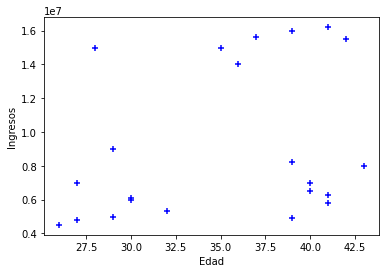

In [183]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.xlabel('Edad')
plt.ylabel('Ingresos')

plt.scatter(dtincome.Edad, dtincome.Ingresos, color ='blue',marker='+')

In [184]:
from sklearn.cluster import KMeans
Km=KMeans(n_clusters=3)
Km

KMeans(n_clusters=3)

In [185]:
y_predict = Km.fit_predict(dtincome[['Edad','Ingresos']])
y_predict

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2])

In [186]:
dtincome['cluster'] = y_predict
dtincome.head()

,Nombre,Edad,Ingresos,cluster
0,DAYAN,27,7000000,2
1,HELMAN,29,9000000,2
2,JOHNATAN,30,6100000,0
3,JAIME,30,6000000,0
4,DANIELA,28,15000000,1


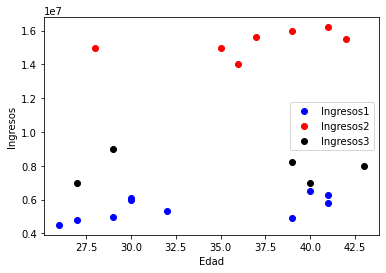

In [187]:
import numpy as np
import matplotlib.pyplot as plt

dtincome1 = dtincome[dtincome.cluster==0]
dtincome2 = dtincome[dtincome.cluster==1]
dtincome3 = dtincome[dtincome.cluster==2]

plt.scatter(dtincome1.Edad,dtincome1['Ingresos'], color='blue')
plt.scatter(dtincome2.Edad,dtincome2['Ingresos'], color='red')
plt.scatter(dtincome3.Edad,dtincome3['Ingresos'], color='black')

plt.xlabel('Edad')
plt.ylabel('Ingresos')
plt.legend(['Ingresos1', 'Ingresos2', 'Ingresos3'])
plt.show()

In [188]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dtincometmp= dtincome.drop(['Nombre'], axis='columns')
cluster_tmp =pd.DataFrame(dtincometmp.cluster)
dtincometmp= dtincome.drop(['Nombre','cluster'], axis='columns')
dtincometmp.head()

,Edad,Ingresos
0,27,7000000
1,29,9000000
2,30,6100000
3,30,6000000
4,28,15000000


In [189]:
scaler.fit(dtincometmp)
dtincometmp = scaler.transform(dtincometmp)
dtincometmp

array([[0.05882353, 0.21367521],
       [0.17647059, 0.38461538],
       [0.23529412, 0.13675214],
       [0.23529412, 0.12820513],
       [0.11764706, 0.8974359 ],
       [0.94117647, 0.94017094],
       [0.76470588, 0.98290598],
       [0.88235294, 1.        ],
       [0.64705882, 0.94871795],
       [0.58823529, 0.81196581],
       [0.52941176, 0.8974359 ],
       [0.        , 0.        ],
       [0.05882353, 0.02564103],
       [0.17647059, 0.03846154],
       [0.35294118, 0.06837607],
       [0.82352941, 0.17094017],
       [0.88235294, 0.15384615],
       [1.        , 0.2991453 ],
       [0.76470588, 0.31623932],
       [0.88235294, 0.11111111],
       [0.76470588, 0.03418803],
       [0.82352941, 0.21367521]])

In [190]:
Km=KMeans(n_clusters=3)

Km

KMeans(n_clusters=3)

In [191]:
dtincometmp = pd.DataFrame(dtincometmp)
dtincometmp['cluster']= cluster_tmp
dtincometmp.columns = ['Edad', 'Ingresos', 'cluster']
dtincometmp.head()

,Edad,Ingresos,cluster
0,0.058824,0.213675,2
1,0.176471,0.384615,2
2,0.235294,0.136752,0
3,0.235294,0.128205,0
4,0.117647,0.897436,1


In [192]:
y_predict = Km.fit_predict(dtincometmp[['Edad','Ingresos']])
y_predict

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [193]:
dtincometmp.head()

,Edad,Ingresos,cluster
0,0.058824,0.213675,2
1,0.176471,0.384615,2
2,0.235294,0.136752,0
3,0.235294,0.128205,0
4,0.117647,0.897436,1


In [194]:
Km.cluster_centers_

array([[0.8487395 , 0.18559219],
       [0.16176471, 0.12446581],
       [0.63865546, 0.92551893]])

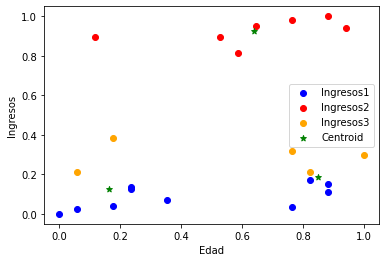

In [197]:

dtincome1 = dtincometmp[dtincometmp.cluster==0]
dtincome2 = dtincometmp[dtincometmp.cluster==1]
dtincome3 = dtincometmp[dtincometmp.cluster==2]

plt.scatter(dtincome1.Edad,dtincome1['Ingresos'], color='blue')
plt.scatter(dtincome2.Edad,dtincome2['Ingresos'], color='red')
plt.scatter(dtincome3.Edad,dtincome3['Ingresos'], color='orange')

plt.scatter(Km.cluster_centers_[:,0], Km.cluster_centers_[:,1],color='green', marker='*', label='centroid')

plt.xlabel('Edad')
plt.ylabel('Ingresos')
plt.legend(['Ingresos1', 'Ingresos2', 'Ingresos3', 'Centroid'])
plt.show()

[5.525389416115616, 2.560431995309114, 0.7845943586533373, 0.4669828770073131, 0.34224903629145353, 0.2556909295626654, 0.18225133115301106, 0.140514939802566, 0.11898425355712505]


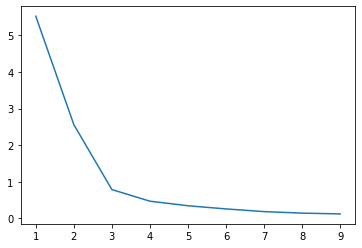

In [207]:
sse=[]
no_of_cluster = []

for i in range(1,10): 
    km = KMeans(n_clusters=i)
    cluster_predicted = km.fit(dtincometmp[['Edad', 'Ingresos']])
    no_of_cluster.append(i) 
    sse.append(cluster_predicted.inertia_)
print(sse)
plt.plot(no_of_cluster, sse)